In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Kurulum ve kontrolleri yaptığımız kısım


In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17133448454763016573
 xla_global_id: -1]

In [3]:
!ls drive


MyDrive


In [4]:
import os
os.chdir("/content/drive/MyDrive/Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari")
!pwd


/content/drive/MyDrive/Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari


In [5]:
!ls


 Artistik_Stil_Transferi	    javierbardem.png	    rakamtanima_cnn.py
 Duygu_Tanima			   'kemal sunal.png'	    README.md
 EvrisimliSinirAgi_AdimAdim.ipynb   ksgrafik.png	    YOLO_ile_Nesne_Yeri_Tespiti
 evrisimlisiniragi_adimadim.py	    nesneler.PNG	    yolo.PNG
 Fashion_MNIST.ipynb		    Nesne_Tanima
 fashion_mnist.py		    RakamTanima_CNN.ipynb


In [6]:
!pip install -q keras

Uygulamayı Kodlamaya Başlayalım




In [7]:
from __future__ import print_function
import keras
import tensorflow
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from keras import backend as K

import matplotlib.pyplot as plt
import numpy as np


In [8]:

!pip install -q keras
!pip install -q tensorflow

!pip install keras.utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2632 sha256=7466030b1c23ad0a075ff38a103b5b785a5cfd9ff60d25d154bb495cd4622f5f
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras.utils


In [9]:
# Veriyi rastgele bir şekilde eğitim ve test olarak ayırabiliriz
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


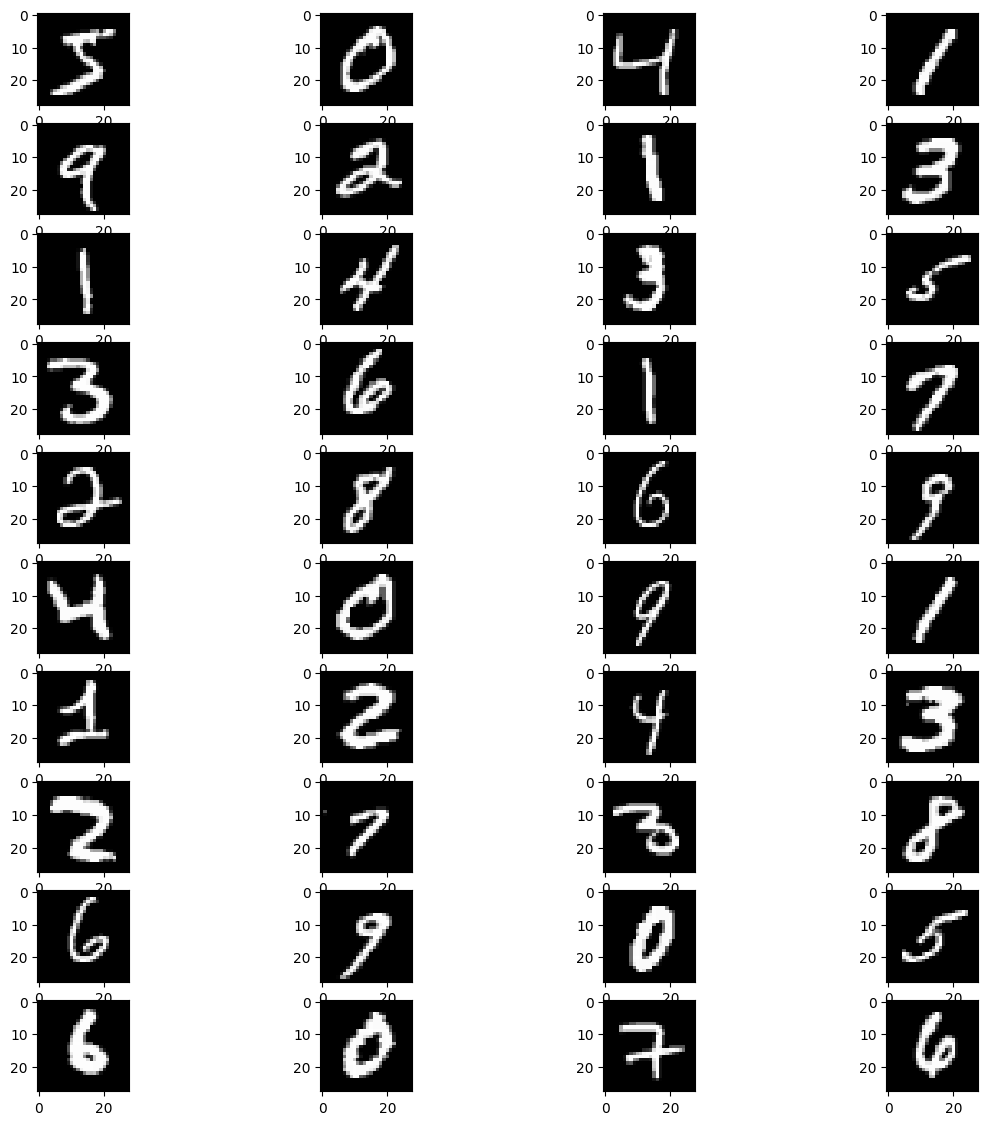

In [10]:
# Görüntüleri görselleştirelim
plt.figure(figsize = (14,14))
x, y = 10, 4

for i in range(40):
    plt.subplot(x, y, i+1)
    plt.imshow(x_train[i], cmap='gray')
plt.show()

In [11]:
# batch_size : buna bir alt paket diyebiliriz. Her iterasyonda veri seti içerisinde tamamını eğitmiyor. Veri seti içerisinde paketleri paket paket eğitiyor.
# her bir kümenin, paketin içerisinde kaç tane kümenin olacağını, boyutunu giriyoruz

batch_size = 128
num_classes = 10     # 0-9 kadar sayılar var
epochs = 5         # eğitim 5 epoch da gerçekleşsin diyoruz çok uzun sürmemesi adına

img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [12]:
x_train.shape[0]

60000

`x_train = x.train.reshape(x_tarin.shape[0], 1, img_rows, img_cols, 1)` kodu, eğitim verilerini (`x_train`) yeniden şekillendirmek için kullanılmaktadır. Yeniden şekillendirme, verilerin boyutunu ve biçimini değiştirmek anlamına gelir. Bu durumda, eğitim verileri 5 boyutlu bir numpy dizisi haline getirilmektedir.

* İlk boyut, örnek sayısını temsil eder (`x_tarin.shape[0]`).
* İkinci boyut, kanal sayısını temsil eder. Bu durumda, gri tonlamalı görüntüler kullandığımız için kanal sayısı 1'dir.
* Sonraki üç boyut, görüntü satır sayısını, görüntü sütun sayısını ve görüntü derinliğini temsil eder (`img_rows`, `img_cols` ve `1`).

Yeniden şekillendirme, derin öğrenme modellerinde yaygın olarak kullanılmaktadır. Bunun nedeni, derin öğrenme modellerinin genellikle 4 veya 5 boyutlu girdi verilerini beklemesidir. Bu nedenle, eğitim verilerimizi modele beslemeden önce yeniden şekillendirmemiz gerekir.

Aşağıdaki örnek, `x_train` verilerinin yeniden şekillendirilmesini göstermektedir:

---
` input_shape = (img_rows, img_cols, 1) ` kodu, derin öğrenme modelinin giriş şeklini tanımlamak için kullanılmaktadır. Giriş şekli, modelin beklediği veri boyutunu ve biçimini temsil eder. Bu durumda, model gri tonlamalı görüntüler beklemektedir. Görüntüler `img_rows` satır ve `img_cols` sütuna sahip olacak ve her piksel tek bir kanal (1) değerine sahip olacaktır.

input_shape argümanı, genellikle modelin ilk katmanına aktarılır. Bu, modelin ilk katmanının verileri beklenen şekilde işlemesini sağlar.

In [93]:
 #hatalı one-hot-encoding
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
print("Giriş verilerinin şekli:", x_train.shape)
print("Sınıf etiketlerinin şekli:", y_train.shape)

Giriş verilerinin şekli (60000, 28, 28, 1) olarak görünüyor ve bu, her biri 28x28 piksel boyutunda gri tonlamalı bir görüntü içeren 60000 örneği temsil eder.

Ancak sınıf etiketlerinin şekli (60000, 10, 10, 10) olarak görünüyor ve bu şekil beklenen bir one-hot encoding yapılandırması değil. Sınıf etiketleri (y_train) her bir örnek için 10 sınıfın olasılık dağılımını içermesi gereken bir matris olmalıdır.

Sorun, sınıf etiketlerinin yanlış bir şekilde yapılandırılmış olabileceğini gösteriyor. One-hot encoding kullanıyorsanız, sınıf etiketleri her bir örneğin her sınıf için bir olasılık değeri içeren bir matris olmalıdır. Örneğin, her sınıf için bir sütun olmalıdır ve her sınıfın olasılık değeri 0 ile 1 arasında olmalıdır.

Sınıf etiketlerinin düzeltilmesi gerekebilir. Eğer sınıf etiketleriniz one-hot encoding ile kodlanmışsa, sınıf etiketlerinin doğru bir şekilde oluşturulması gerekmektedir. İşte örnek bir düzeltme adımı:

In [13]:
from keras.utils import to_categorical

# Sınıf etiketlerini one-hot encoding ile kodlayın
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [19]:
print("Giriş verilerinin şekli:", x_train.shape)
print("Sınıf etiketlerinin şekli:", y_train.shape)


Giriş verilerinin şekli: (60000, 28, 28, 1)
Sınıf etiketlerinin şekli: (60000, 10)


Bu kod, sınıf etiketlerini one-hot encoding ile kodlamak için Keras kütüphanesinin `to_categorical` işlevini kullanır. One-hot encoding, çoklu sınıf sınıflandırma problemlerinde sınıf etiketlerini daha anlamlı ve işlem yapılabilir bir biçimde temsil etmeye yarar. Özellikle sınıflar arasındaki ilişkiyi tanımlamak için kullanılır.

İşte bu kod parçasının açıklaması:

1. `from keras.utils import to_categorical`: Keras kütüphanesinin `to_categorical` işlevini kullanabilmek için gereken işlevi içe aktarır.

2. `y_train = to_categorical(y_train, num_classes)`: Eğitim veri kümesindeki sınıf etiketlerini one-hot encoding ile kodlar. `y_train` sınıf etiketlerini içeren veriyi temsil eder. `num_classes`, toplam sınıf sayısını temsil eder ve her bir sınıf için bir sütun içeren bir matris elde etmek için kullanılır. Örneğin, eğer `num_classes` 10 ise, her örnek için 10 sütun içeren bir matris oluşturulur ve her bir sütun, bir sınıfı temsil eder. Sadece doğru sınıf 1, diğer sınıflar ise 0 ile kodlanır.

3. `y_test = to_categorical(y_test, num_classes)`: Test veri kümesindeki sınıf etiketlerini aynı şekilde one-hot encoding ile kodlar. Bu, eğitim ve test veri kümesi arasında uyumlu sınıf etiketleri oluşturmanıza yardımcı olur.

Sonuç olarak, bu işlem sınıf etiketlerini daha işlenebilir bir biçime dönüştürür ve modelin çoklu sınıf sınıflandırma görevini daha etkili bir şekilde gerçekleştirmesine olanak tanır.

# Model Oluşturma


In [14]:
model = Sequential()  #

Bu satır, bir Keras modeli oluşturmak için kullanılır. `Sequential()` fonksiyonu, sıralı bir model oluşturmanıza izin verir. Sıralı bir model, katmanları ardışık olarak eklediğiniz bir yapılı modele işaret eder. Bu tip model, sıralı işlemler için uygundur, özellikle giriş verisini aldıktan sonra birçok katmandan geçirilen derin öğrenme modellerinde yaygın olarak kullanılır.

Örnek bir kullanım:

```python
from keras.models import Sequential

model = Sequential()
```

Bu kod parçası, boş bir sıralı model oluşturur. Ardından, bu modele katmanlar eklenerek bir derin öğrenme modeli oluşturabilirsiniz. Örneğin, evrişimli sinir ağı (Convolutional Neural Network - CNN) veya tam bağlantılı bir sinir ağı (Fully Connected Neural Network) gibi farklı katmanları ekleyerek modelinizi tanımlayabilirsiniz.

Modelinizi tanımladıktan sonra, modelin derinliğini, katmanlarını ve parametrelerini eklemeye devam edebilir ve sonunda modelinizi derlemek ve eğitmek için kullanabilirsiniz.

**Katmanların Oluşturulması**


In [15]:
model.add(Conv2D(32, kernel_size=(3,3),
                 activation = 'relu',
                 input_shape = input_shape))

model.add(Conv2D(64, (3,3),
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0,25))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))

model.add(Dropout(0.50))

model.add(Dense(num_classes, activation = 'softmax'))


Bu kod örnekleri, bir evrişimli sinir ağı (Convolutional Neural Network - CNN) modelini tanımlamak için kullanılır. İşte bu kod parçalarının ne yaptığının açıklamaları:

1. `model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))`: İlk olarak, 2D evrişimli katman (Convolutional Layer) eklenir. Bu katman, 32 filtre (kernel) kullanır ve her bir filtre 3x3 boyutunda bir çekirdek ile veriyi işler. 'relu' aktivasyon fonksiyonu kullanılır ve 'input_shape' parametresi, giriş verisi şeklini belirtir.

2. `model.add(Conv2D(64, (3,3), activation='relu'))`: İkinci bir 2D evrişimli katman eklenir. Bu katman, 64 filtre kullanır ve yine her bir filtre 3x3 boyutunda bir çekirdek ile veriyi işler. 'relu' aktivasyon fonksiyonu kullanılır.

3. `model.add(MaxPooling2D(pool_size=(2,2))`: Max pooling katmanı eklenir. Bu, evrişimli katmanlar arasında kullanılır ve veriyi küçültmek ve önemli özellikleri çıkarmak için kullanılır. Burada 2x2 boyutunda bir havuzlama penceresi kullanılır.

4. `model.add(Dropout(0.25))`: Dropout katmanı eklenir. Dropout, aşırı uyum (overfitting) problemini azaltmak için kullanılır. Bu katman, %25 oranında rastgele nöronları devre dışı bırakır.

5. `model.add(Flatten())`: Flatten katmanı, 2D veriyi düz bir vektöre dönüştürür, böylece tam bağlantılı (fully connected) katmanlara giriş yapabilir.

6. `model.add(Dense(128, activation='relu')`: Tam bağlantılı bir gizli katman (dense layer) eklenir. 128 nörona sahiptir ve 'relu' aktivasyon fonksiyonu kullanır.

7. `model.add(Dropout(0.50))`: Bir başka Dropout katmanı eklenir, bu sefer %50 oranında nöronları devre dışı bırakır.

8. `model.add(Dense(num_classes, activation='softmax')`: Çıkış katmanı eklenir. Bu, modelin sınıf tahminlerini üreteceği yerdir. 'num_classes' sınıf sayısına eşittir ve 'softmax' aktivasyon fonksiyonu kullanılır.

Bu kod parçaları, evrişimli sinir ağı modelini tanımlar. Daha sonra bu model derlenir (compile edilir) ve verilerle eğitilir. Model, sınıf tahminleri yapmak için kullanılabilir.

**Model Görselleştirme**



In [16]:
model.summary()   # Param : katmanlarda öğrenilen parametre sayısı
                  # ortaklama (pooling) katmanlarında öğrenme işlemi olmaz

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [17]:
from keras.src.engine.base_layer import TensorFlowOpLayer
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = tensorflow.keras.optimizers.Adadelta(),
              metrics = ['accuracy'])

In [75]:
model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = tensorflow.keras.optimizers.Adadelta(),
             metrics = ['accuracy'])

Bu kod parçası, bir Keras modelini derlemek için kullanılır. Derleme işlemi, modelin eğitim için nasıl yapılandırılacağını belirler. İşte bu kodun ayrıntıları:

- `loss = keras.losses.categorical_crossentropy`: Bu, modelin kayıp (loss) fonksiyonunu belirtir. 'categorical_crossentropy', çoklu sınıf sınıflandırma problemleri için yaygın olarak kullanılan bir kayıp fonksiyonudur. Modelin tahminlerinin gerçek etiketlerle ne kadar uyumlu olduğunu ölçer.

- `optimizer = tensorflow.keras.optimizers.Adadelta()`: Bu, eğitim sırasında kullanılacak optimizasyon algoritmasını belirtir. 'Adadelta', bir optimizasyon algoritmasıdır ve ağırlıkları güncellemek için kullanılır. Keras, birçok farklı optimizasyon algoritmasını destekler ve bu algoritmayı seçerek modelin nasıl eğitileceğini belirlersiniz.

- `metrics = ['accuracy']`: Bu, eğitim sırasında izlenecek metrikleri belirtir. 'accuracy', modelin eğitim sırasında doğruluk oranını (accuracy) hesaplamak için kullanılacak bir metriktir. Bu, modelin sınıf tahminlerinin ne kadar doğru olduğunu izlemeye yardımcı olur.

Derleme işlemi, modelin eğitimi için gerekli olan temel ayarları yapar. Daha sonra model, bu ayarlarla uyumlu bir şekilde eğitilir ve eğitim sırasında belirtilen kayıp fonksiyonu ve metrikler kullanılarak performansı izlenir.

**Eğitim**

In [18]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 144s 306ms/step - loss: 14.9812 - accuracy: 0.2259 - val_loss: 2.6044 - val_accuracy: 0.5741
Epoch 2/5
469/469 [==============================] - 142s 302ms/step - loss: 5.1792 - accuracy: 0.4177 - val_loss: 1.3141 - val_accuracy: 0.7014
Epoch 3/5
469/469 [==============================] - 136s 290ms/step - loss: 2.5756 - accuracy: 0.5174 - val_loss: 0.9217 - val_accuracy: 0.7390
Epoch 4/5
469/469 [==============================] - 142s 303ms/step - loss: 1.7358 - accuracy: 0.5569 - val_loss: 0.8079 - val_accuracy: 0.7632
Epoch 5/5
469/469 [==============================] - 139s 297ms/step - loss: 1.4266 - accuracy: 0.5886 - val_loss: 0.7380 - val_accuracy: 0.7809


In [21]:
# modelimizi 5 epoch için çalıştırdık ve bir başarım sonucu elde ettik, elde ettiğimiz başarım sonucunu .h5 dosyası olarak kaydedebiliriz
#Kaydettiğimiz zaman benzer veri veri ile h5 dosyamızı çağırarak direk ( eğitim yapmadan ) test yapabiliriz çünkü daha önce eğitilmiş bir model olduğu için
model.save('/mnist_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test Loss :', score[0])
print('Test Accuracy :', score[1])

Test Loss : 0.7380313277244568
Test Accuracy : 0.7809000015258789


Bu kod, eğitilmiş bir modelin test verileri üzerindeki performansını değerlendirmek için kullanılır. İşte bu kodun açıklaması:

1. `score = model.evaluate(x_test, y_test, verbose=0)`: `model.evaluate` işlemi, modelin test verileri (x_test) üzerindeki performansını değerlendirir. `x_test`, test verilerini temsil ederken, `y_test` ise test verilerinin doğru sınıf etiketlerini içerir. Bu işlem, modelin test verileri üzerindeki kaybını ve doğruluk (accuracy) skorunu hesaplar. `verbose` argümanı, işlemin çıktı düzeyini belirler. 0 olarak ayarlandığında, herhangi bir çıktı görüntülenmez.

2. `print('Test Loss:', score[0])`: Bu satır, test verileri üzerindeki kaybı ekrana yazdırır. `score[0]`, kaybı temsil eder. Daha düşük kayıp, modelin test verileri üzerinde daha iyi bir performans gösterdiğini gösterir.

3. `print('Test Accuracy:', score[1])`: Bu satır, test verileri üzerindeki doğruluk (accuracy) skorunu ekrana yazdırır. `score[1]`, doğruluk skorunu temsil eder. Doğruluk skoru, modelin doğru sınıflandırma yüzdesini ifade eder. Daha yüksek bir doğruluk skoru, modelin daha iyi performans gösterdiğini gösterir.

Bu kod, eğitilmiş bir modelin test verileri üzerinde ne kadar iyi performans gösterdiğini değerlendirmek için yaygın olarak kullanılır. Modelin doğruluk ve kayıp değerleri, modelin performansını anlamak için kullanılır.

`verbose` argümanı, `model.evaluate` işleminin sırasında çıktı düzeyini kontrol eder. `verbose` değerine göre işlemin nasıl bir çıktı üreteceğini belirler. İşte `verbose` argümanının farklı değerlerinin ne anlama geldiği:

- `verbose=0`: Hiçbir çıktı üretilmez. Modelin test sonuçları sessizce hesaplanır ve döndürülür. Bu seçenek, otomasyon veya script çalışmaları için uygundur, çünkü ekstra çıktılar göstermez ve işlem daha sessiz olur.

- `verbose=1`: İlerleme çubuğu (progress bar) ile birlikte sonuçlar gösterilir. Test işlemi başladığında ve tamamlandığında, ekranda ilerleme çubuğu ile ilerlemenizi takip edebilirsiniz. Sonuçlar (örneğin, test kaybı ve doğruluk) işlem tamamlandığında görüntülenir. Bu seçenek, işlemin ne kadar süreceğini ve ne zaman tamamlandığını görmek istediğinizde kullanışlıdır.

- `verbose=2`: Her bir test örneğinin sonucu (örneğin, her bir örneğin kaybı ve doğruluğu) ayrıntılı olarak ekrana yazdırılır. Bu, her bir örneğin sonucunu görmek istediğinizde kullanışlıdır, ancak büyük veri kümesi üzerinde çalışırken ekranı çok fazla doldurabilir.

Genellikle, hangi `verbose` seçeneğinin kullanılacağı işlemi izleme ihtiyacınıza bağlıdır. Verbose olmayan (0) seçenek otomasyon ve script çalışmaları için uygunken, diğer seçenekler işlemi takip etmek ve sonuçları görmek için kullanışlıdır.

**Rastgele değer için test işlemi**

In [25]:
model_test = model.save('/mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
test_image = x_test[32]
y_test[32]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

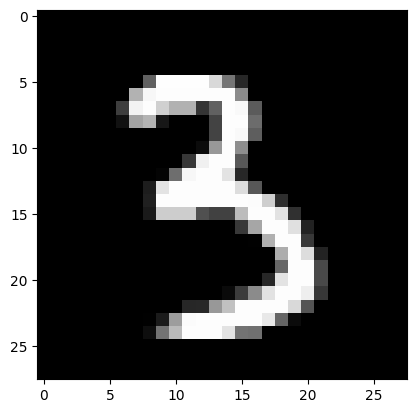

In [31]:
plt.imshow(test_image.reshape(28,28), cmap='gray', vmin=2, vmax=255)

Bu kod parçası, bir eğitilmiş Keras modelini kaydeder ve daha sonra bu modeli kullanarak test verileri üzerinde tahminlerde bulunur. İşte bu kodun adım adım açıklaması:

1. `model.save('/mnist_model.h5')`: Eğitilmiş modelin `mnist_model.h5` adlı bir dosyaya kaydedilmesini sağlar. Modeli kaydetmek, modelin ağırlıklarını, yapılandırmasını ve eğitim durumunu bir dosyada saklar. Bu, daha sonra modelin yeniden yüklenmesi ve kullanılması için gereklidir.

2. `test_image = x_test[32]`: Test veri kümesinden 32. örneği `test_image` değişkenine atar. Bu, modelin bu belirli görüntüyü sınıflandırma yeteneğini test etmek için kullanılacak bir örnek görüntüdür.

3. `y_test[32]`: Test veri kümesindeki 32. örneğin doğru sınıf etiketini (sınıf numarasını) görüntüler. Bu, modelin bu örneği doğru bir şekilde sınıflandırıp sınıflandırmadığını kontrol etmek için kullanılacaktır.

4. `plt.imshow(test_image.reshape(28, 28), cmap='gray', vmin=2, vmax=255)`: `matplotlib` kütüphanesini kullanarak, `test_image` değişkenindeki görüntüyü görsel olarak görüntüler. `cmap='gray'` ile görüntünün gri tonlamalı olduğunu belirtir. `vmin` ve `vmax` ile görüntünün renk aralığını sınırlar.

Bu kod, eğitilmiş modeli kaydedip daha sonra test verileri üzerinde nasıl kullanacağınızı gösterir. Bu işlem, modelin başka veriler üzerinde nasıl kullanılacağını anlamak için önemlidir. Ayrıca, bu modelin belirli bir görüntüyü sınıflandırma yeteneğini görsel olarak kontrol etmenizi sağlar.